#### TP SEMANAL 6

### Consigna

Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:

- $w_0=2\pi.22kHz$
- $Q = 5$
- Aproximación Chebyshev con ripple de 0,5 dB

También se sabe que la transferencia del filtro debe ser:

- |$T(f_{s1})$|=-16dB para $f_{s1}$=17kHz
- |$T(f_{s2})$|=-24dB para $f_{s2}$=36kHz

<img src="image45.png">

Consignas de la actividad:

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

<img src="image46.png">

Informe

Respecto al informe, se mantiene el mismo formato usado hasta el momento, informe en jupyter-notebook, simulaciones en python y LTspice. Se mantienen las recomendaciones para la inclusión de gráficas y resultados de la simulación, y se agrega:

+ Cada figura deberá tener una leyenda o un párrafo que haga referencia a ella

+ Al menos una sección donde:

     * se discutan los resultados obtenidos, factibilidad de implementación de la red, componentes sensibles, etc.

     * se informe las dificultades o problemas, si las hubiera

     * se destaquen los aspectos salientes de la resolución propuesta.

### Manuscrito

<img src="image55.jpg">

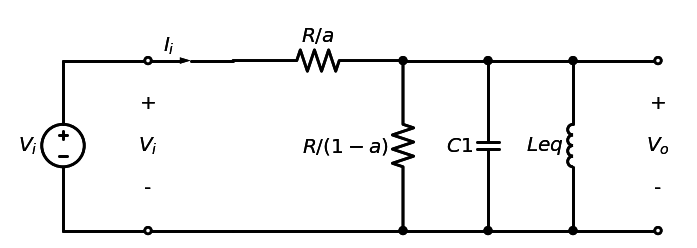

In [1]:
from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex

d = Drawing(unit=4)
d = dibujar_elemento_derivacion(d, "V",  with_nodes=False, sym_label="V_i")
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_entrada(d, voltage_lbl=('+', to_latex('V_i'), '-'), current_lbl=to_latex('I_i'))
d = dibujar_elemento_serie(d, "R", sym_label='R/a')
d = dibujar_elemento_derivacion(d, "R", sym_label="R/(1-a)")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "C", sym_label="C1")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "L", sym_label="Leq")
d = dibujar_puerto_salida(d, voltage_lbl=('+', to_latex('V_o'), '-'))
display(d)

Impedancia vista del circuito. 

$$Z_{in} = \frac{Y_2.Y_4}{Y_1.Y_3.Y_5} = S$$

Transferencia:

$$T(S) = \frac{\frac{GaS}{C}}{S^2+S\frac{G}{C}+\frac{1}{LC}}$$

In [2]:
import scipy.signal as sig
from IPython.display import display, Math
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, pretty_print_SOS, pretty_print_lti

N = 3
ALPHA_MAX = .5

z,p,k = sig.cheb1ap(N, ALPHA_MAX)
num, den = sig.zpk2tf(z,p,k)
sos_cheb = tf2sos_analog(num, den)
display("## Circuito Pasabajos")
display(Math("T(s) = " + pretty_print_SOS(sos_cheb, mode='omegayq', displaystr=False)))

#######################################################################################

Q  = 5
w0 = .6264

a   = 1.069/1.706
b   = 1.143

num1 = np.array([0,0,0, w0/Q, 0])
den1 = np.array([0,0,1, w0/Q, 1])

num2 = np.array([0,0,b/Q**2,0,0])
den2 = np.array([1,a/Q,(2*(Q**2)+b)/(Q**2),a/Q,1])

# Multiply polynomials using np.polymul()
num = np.polymul(num1, num2)
den = np.polymul(den1, den2)

sos_cheb = tf2sos_analog(num, den)
display("## Circuito Pasabandas")
display(Math("T_{bp}(s) = " + pretty_print_SOS(sos_cheb, mode='omegayq', displaystr=False)))
display(Math("T_{bp}(s) = " + pretty_print_lti(num, den, displaystr=False)))


'## Circuito Pasabajos'

<IPython.core.display.Math object>

'## Circuito Pasabandas'

<IPython.core.display.Math object>

<IPython.core.display.Math object>


### Simulaciones

## Circuito RLC PasaBanda

<img src="image47.png">

<img src="image48.png">

<img src="image49.png">

<img src="image50.png">

## Circuito Pasabanda con Activos

<img src="image51.png">

<img src="image52.png">

<img src="image53.png">

<img src="image54.png">